# Descriptive Statistics - Wine Dataset

### Objective
The purpose of this assignment is to learn how to determine numerical characteristics of a certain independent variable, construct boxplots, and utilize them in data analysis.

## 1. Wine Dataset - info
In the Wine dataset, the variables represent the following:
1. **alcohol**: Alcohol content in the wine (in percentage)
2. **malic_acid**: Malic acid content (in g/L)
3. **ash**: Amount of ash (in g/L)
4. **alcalinity_of_ash**: Alcalinity of ash (in ash alkalinity units)
5. **magnesium**: Amount of magnesium (in mg/L)
6. **total_phenols**: Total phenols content (in g/L)
7. **flavanoids**: Flavanoids content (in g/L)
8. **nonflavanoid_phenols**: Non-flavanoid phenols content (in g/L)
9. **proanthocyanins**: Proanthocyanins content (in g/L)
10. **color_intensity**: Color intensity
11. **hue**: Hue
12. **od280/od315_of_diluted_wines**: The ratio of two OD (Optical Density) readings measured at 280nm and
315nm
13. **proline**: Proline content (in mg/L)

These variables describe various chemical characteristics of wines, which can be used for classifying wines
based on their origin.

## 2. Conclusions for selected columns
The numerical characteristics for three independent variables are to be described. Those are: 
- **ash**
- **total_phenols**
- **proanthocyanins**

### **ash**
The mean and median are close but not identical. The distribution appears nearly symmetrical based on the histogram. There are outliers based on the IQR method. Normal distribution law may be assumed here. The distribution is unimodal. The spread is characterized by the range, IQR, and standard deviation. The approximate 95% range is [1.8286, 2.9044] assuming normality.

---

### **total_phenols**
The mean (2.2951) and median (2.355) are close but not identical. The close values of the mean and median suggest a near-symmetrical distribution, but further analysis is needed for confirmation. Using the IQR method, since the minimum (0.98) and maximum (3.88) values are within lower-upper bounds, there are no outliers. It is difficult to assume a specific distribution law in this case. Even though, in theory there is only one mode, the histogram presents there are two of them. The spread is characterized by the range, IQR, and standard deviation. Approximately 95% of the data would be expected to fall within [1.0725, 3.5177].

---

### **proanthocyanins**
The mean (1.591) and median (1.555) are close but not identical. The close mean and median suggest near-symmetry, but it's not conclusive. This variable involves outliers. This variable has close distribution to Gaussian, although it is skewed. The distribution with a mode of 1.35, is unimodal. The spread is characterized by the range, IQR, and standard deviation. Approximately 95% of the data falls within [0.472, 2.709].

In [68]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

plt.style.use("fivethirtyeight")

In [69]:
### Load the Wine dataset

df = datasets.load_wine()
wine = pd.DataFrame(df.data, columns=df.feature_names)
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [70]:
### Function to generate descriptive statistics

def descr_stats(column_name: str):
    data = wine[column_name]

    # Calculate descriptive statistics
    mean = np.mean(data)
    median = np.median(data)
    min_value = np.min(data)
    max_value = np.max(data)
    variance = np.var(data)
    std_deviation = np.std(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    mode = float(stats.mode(data).mode)
    spread = max_value - min_value

    # Display the results
    print(f'Descriptive Statistics - {column_name}:')
    print(f'\tMean: {mean}')
    print(f'\tMedian: {median}')
    print(f'\tMinimum Value: {min_value}')
    print(f'\tMaximum Value: {max_value}')
    print(f'\tVariance: {variance}')
    print(f'\tStandard Deviation: {std_deviation}')
    print(f'\tLower Quartile (Q1): {q1}')
    print(f'\tUpper Quartile (Q3): {q3}')
    print(f'\tInterquartile Range (IQR): {iqr}')
    print(f'\tSpread: {spread}')
    print(f'\tMode: {mode}')

In [71]:
### Function to generate a figure with histogram and boxplot

def boxplot_histogram(column_name: str):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(wine[column_name], kde=True, ax=axes[1], bins=int(np.sqrt(len(wine))), color="salmon")
    axes[0].set_title(f'Boxplot of {column_name}')
    axes[0].set_xlabel(column_name)

    # Boxplot
    sns.boxplot(x=wine[column_name], orient='h', ax=axes[0], width=0.15, color="skyblue")
    axes[1].set_title(f'Histogram of {column_name}')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# alcohol

Descriptive Statistics - alcohol:
	Mean: 13.00061797752809
	Median: 13.05
	Minimum Value: 11.03
	Maximum Value: 14.83
	Variance: 0.6553597304633255
	Standard Deviation: 0.8095429145285168
	Lower Quartile (Q1): 12.362499999999999
	Upper Quartile (Q3): 13.6775
	Interquartile Range (IQR): 1.3150000000000013
	Spread: 3.8000000000000007
	Mode: 12.37


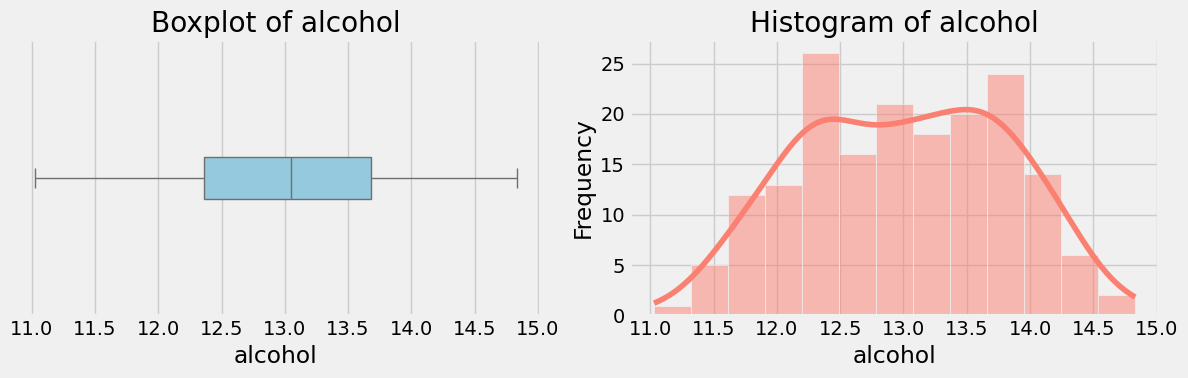

In [72]:
### alcohol

descr_stats("alcohol")
boxplot_histogram("alcohol")

# malic_acid

Descriptive Statistics - malic_acid:
	Mean: 2.3363483146067416
	Median: 1.8650000000000002
	Minimum Value: 0.74
	Maximum Value: 5.8
	Variance: 1.2410040809241256
	Standard Deviation: 1.1140036269797893
	Lower Quartile (Q1): 1.6025
	Upper Quartile (Q3): 3.0825
	Interquartile Range (IQR): 1.48
	Spread: 5.06
	Mode: 1.73


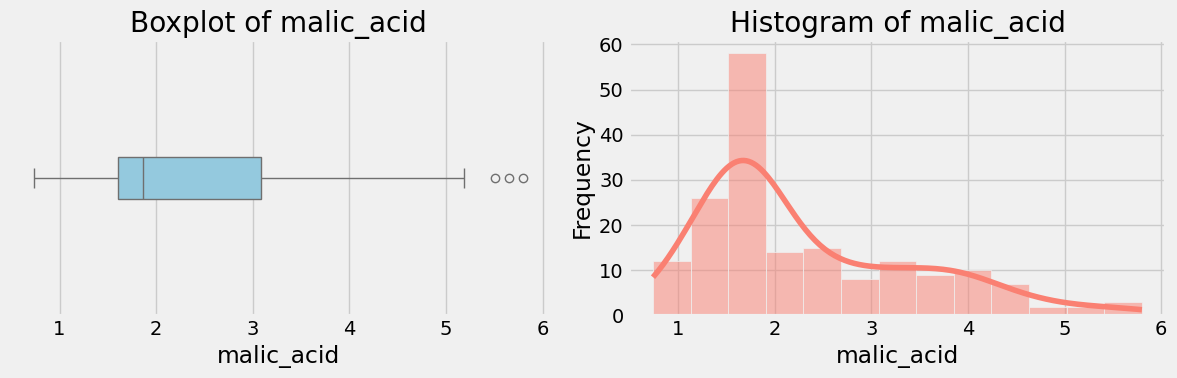

In [73]:
### malic_acid

descr_stats("malic_acid")
boxplot_histogram("malic_acid")

# ash

Descriptive Statistics - ash:
	Mean: 2.3665168539325845
	Median: 2.36
	Minimum Value: 1.36
	Maximum Value: 3.23
	Variance: 0.0748418002777427
	Standard Deviation: 0.27357229442643255
	Lower Quartile (Q1): 2.21
	Upper Quartile (Q3): 2.5575
	Interquartile Range (IQR): 0.34750000000000014
	Spread: 1.8699999999999999
	Mode: 2.28


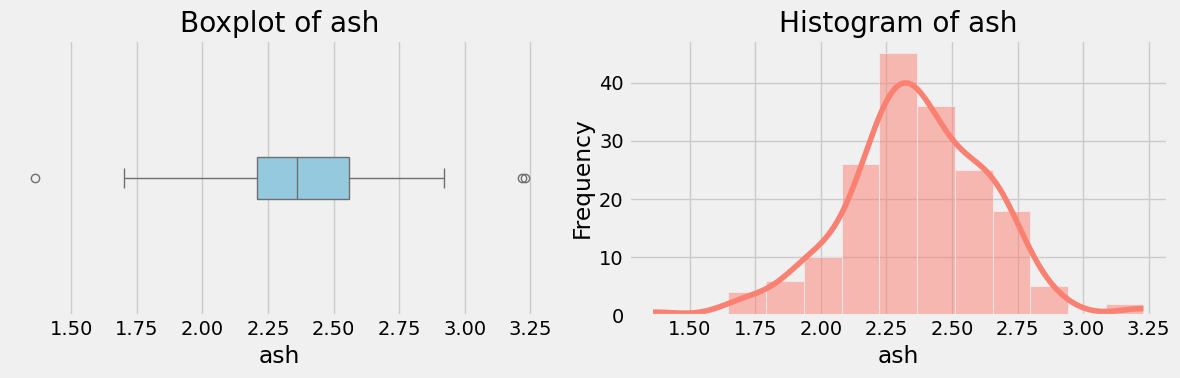

In [74]:
### ash

descr_stats("ash")
boxplot_histogram("ash")

The mean and median are close but not identical. The distribution appears nearly symmetrical based on the histogram. There are outliers based on the IQR method. Normal distribution law may be assumed here. The distribution is unimodal. The spread is characterized by the range, IQR, and standard deviation. The approximate 95% range is [1.8286, 2.9044] assuming normality.

# alcalinity_of_ash

Descriptive Statistics - alcalinity_of_ash:
	Mean: 19.49494382022472
	Median: 19.5
	Minimum Value: 10.6
	Maximum Value: 30.0
	Variance: 11.09003061482136
	Standard Deviation: 3.3301697576582128
	Lower Quartile (Q1): 17.2
	Upper Quartile (Q3): 21.5
	Interquartile Range (IQR): 4.300000000000001
	Spread: 19.4
	Mode: 20.0


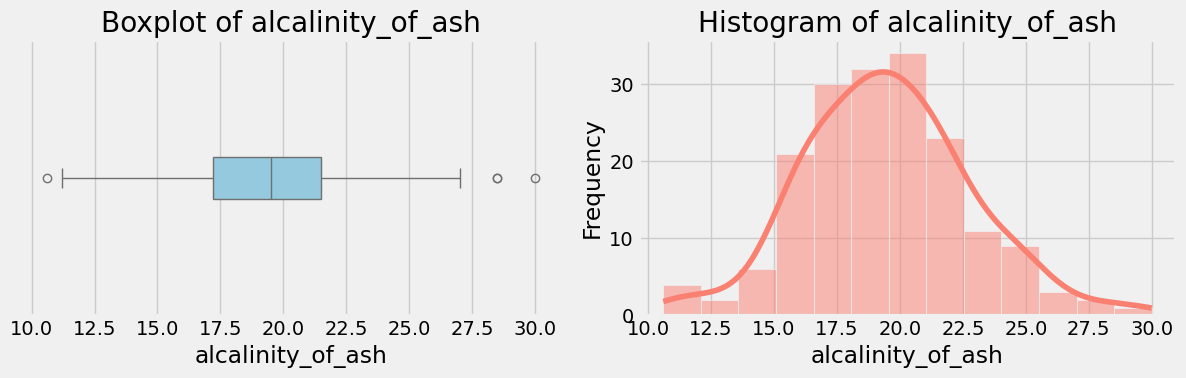

In [75]:
### alcalinity_of_ash

descr_stats("alcalinity_of_ash")
boxplot_histogram("alcalinity_of_ash")

# magnesium

Descriptive Statistics - magnesium:
	Mean: 99.74157303370787
	Median: 98.0
	Minimum Value: 70.0
	Maximum Value: 162.0
	Variance: 202.8433278626436
	Standard Deviation: 14.242307673359806
	Lower Quartile (Q1): 88.0
	Upper Quartile (Q3): 107.0
	Interquartile Range (IQR): 19.0
	Spread: 92.0
	Mode: 88.0


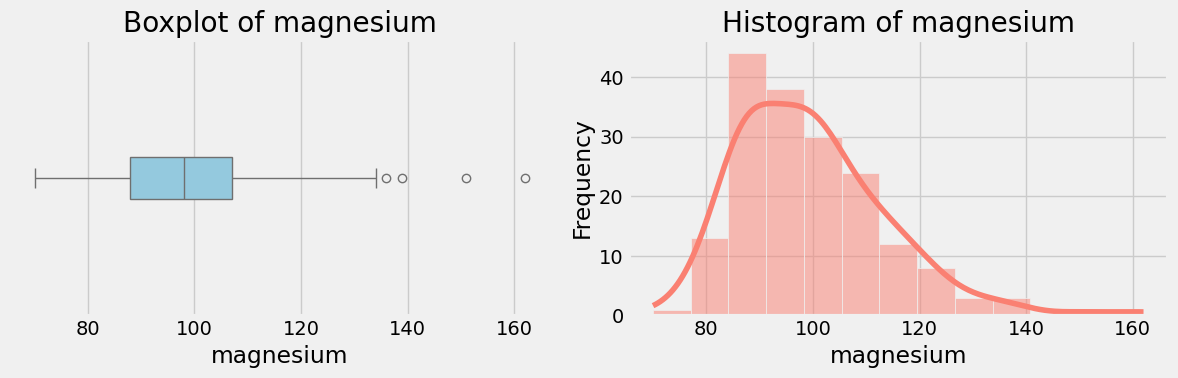

In [76]:
### magnesium

descr_stats("magnesium")
boxplot_histogram("magnesium")

# total_phenols

Descriptive Statistics - total_phenols:
	Mean: 2.295112359550562
	Median: 2.355
	Minimum Value: 0.98
	Maximum Value: 3.88
	Variance: 0.3894890323191517
	Standard Deviation: 0.6240905641965369
	Lower Quartile (Q1): 1.7425
	Upper Quartile (Q3): 2.8
	Interquartile Range (IQR): 1.0574999999999999
	Spread: 2.9
	Mode: 2.2


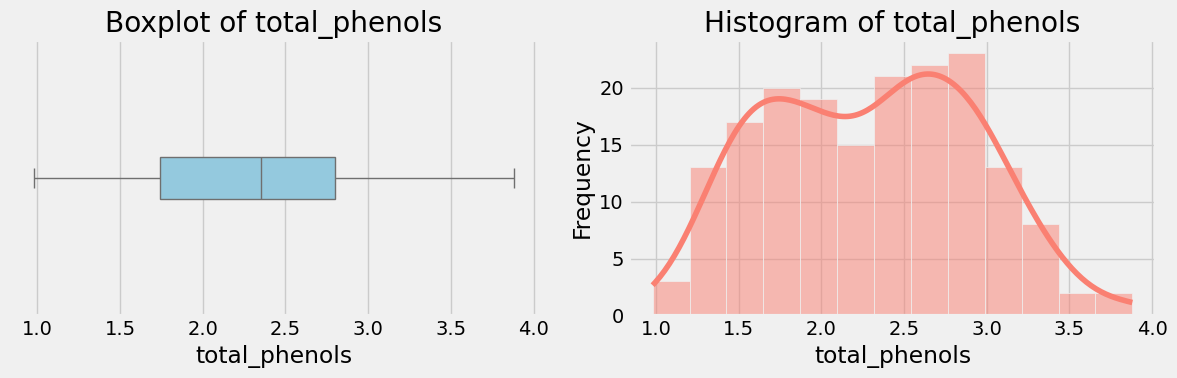

In [77]:
### total_phenols

descr_stats("total_phenols")
boxplot_histogram("total_phenols")

The mean (2.2951) and median (2.355) are close but not identical. The close values of the mean and median suggest a near-symmetrical distribution, but further analysis is needed for confirmation. Using the IQR method, since the minimum (0.98) and maximum (3.88) values are within lower-upper bounds, there are no outliers. It is difficult to assume a specific distribution law in this case. Even though, in theory there is only one mode, the histogram presents there are two of them. The spread is characterized by the range, IQR, and standard deviation. Approximately 95% of the data would be expected to fall within [1.0725, 3.5177].

# flavanoids

Descriptive Statistics - flavanoids:
	Mean: 2.0292696629213487
	Median: 2.135
	Minimum Value: 0.34
	Maximum Value: 5.08
	Variance: 0.9921135115515718
	Standard Deviation: 0.996048950379233
	Lower Quartile (Q1): 1.205
	Upper Quartile (Q3): 2.875
	Interquartile Range (IQR): 1.67
	Spread: 4.74
	Mode: 2.65


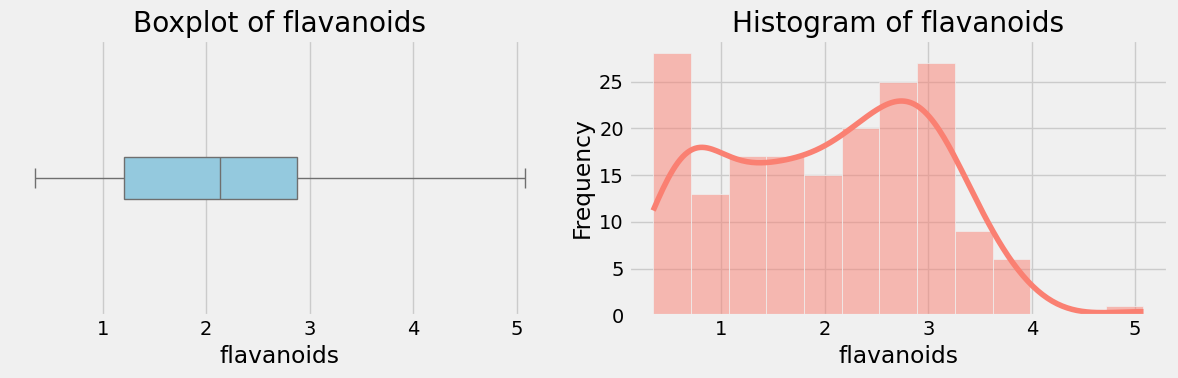

In [78]:
### flavanoids

descr_stats("flavanoids")
boxplot_histogram("flavanoids")

# nonflavanoid_phenols

Descriptive Statistics - nonflavanoid_phenols:
	Mean: 0.3618539325842696
	Median: 0.34
	Minimum Value: 0.13
	Maximum Value: 0.66
	Variance: 0.015401619113748264
	Standard Deviation: 0.12410325988364795
	Lower Quartile (Q1): 0.27
	Upper Quartile (Q3): 0.4375
	Interquartile Range (IQR): 0.16749999999999998
	Spread: 0.53
	Mode: 0.26


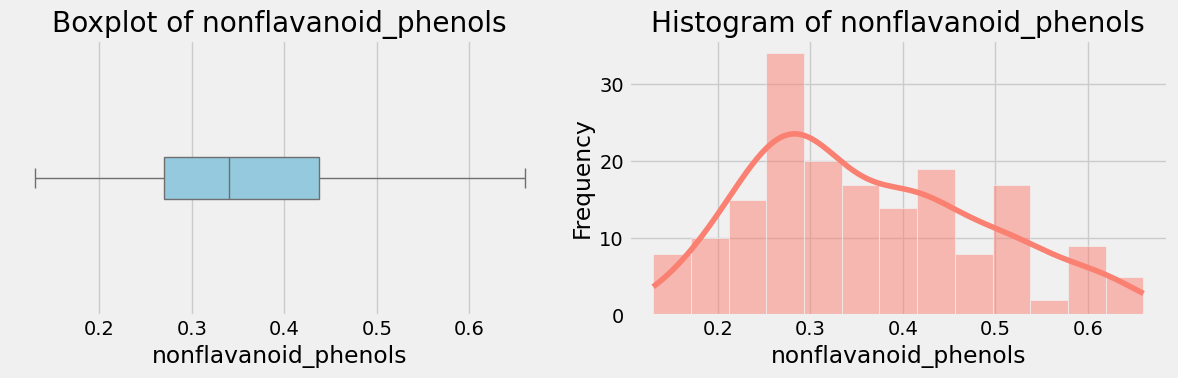

In [79]:
### nonflavanoid_phenols

descr_stats("nonflavanoid_phenols")
boxplot_histogram("nonflavanoid_phenols")

# proanthocyanins

Descriptive Statistics - proanthocyanins:
	Mean: 1.5908988764044945
	Median: 1.5550000000000002
	Minimum Value: 0.41
	Maximum Value: 3.58
	Variance: 0.32575424820098475
	Standard Deviation: 0.5707488486199379
	Lower Quartile (Q1): 1.25
	Upper Quartile (Q3): 1.95
	Interquartile Range (IQR): 0.7
	Spread: 3.17
	Mode: 1.35


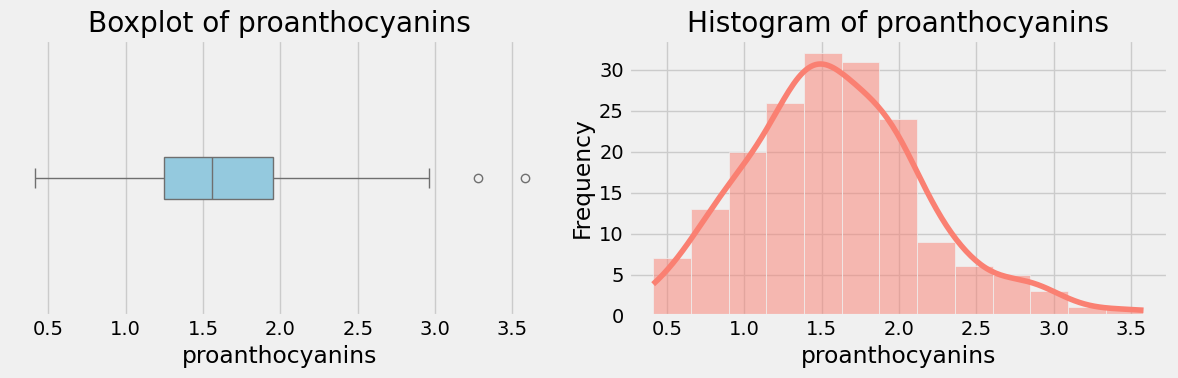

In [80]:
### proanthocyanins

descr_stats("proanthocyanins")
boxplot_histogram("proanthocyanins")

The mean (1.591) and median (1.555) are close but not identical. The close mean and median suggest near-symmetry, but it's not conclusive. This variable involves outliers. This variable has close distribution to Gaussian, although it is skewed. The distribution with a mode of 1.35, is unimodal. The spread is characterized by the range, IQR, and standard deviation. Approximately 95% of the data falls within [0.472, 2.709].

# color_intensity

Descriptive Statistics - color_intensity:
	Mean: 5.058089882022472
	Median: 4.6899999999999995
	Minimum Value: 1.28
	Maximum Value: 13.0
	Variance: 5.344255847629093
	Standard Deviation: 2.3117646609525573
	Lower Quartile (Q1): 3.2199999999999998
	Upper Quartile (Q3): 6.2
	Interquartile Range (IQR): 2.9800000000000004
	Spread: 11.72
	Mode: 2.6


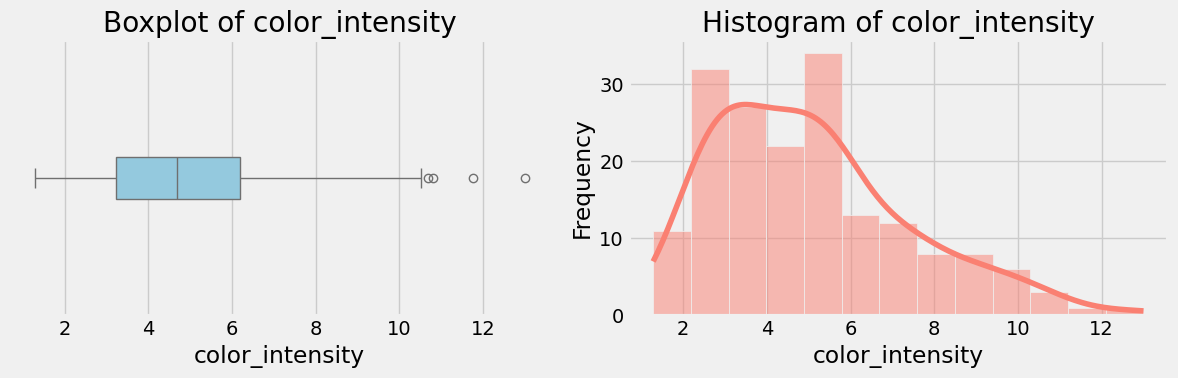

In [81]:
### color_intensity

descr_stats("color_intensity")
boxplot_histogram("color_intensity")

# hue

Descriptive Statistics - hue:
	Mean: 0.9574494382022471
	Median: 0.965
	Minimum Value: 0.48
	Maximum Value: 1.71
	Variance: 0.051951449690695616
	Standard Deviation: 0.22792860656507252
	Lower Quartile (Q1): 0.7825
	Upper Quartile (Q3): 1.12
	Interquartile Range (IQR): 0.33750000000000013
	Spread: 1.23
	Mode: 1.04


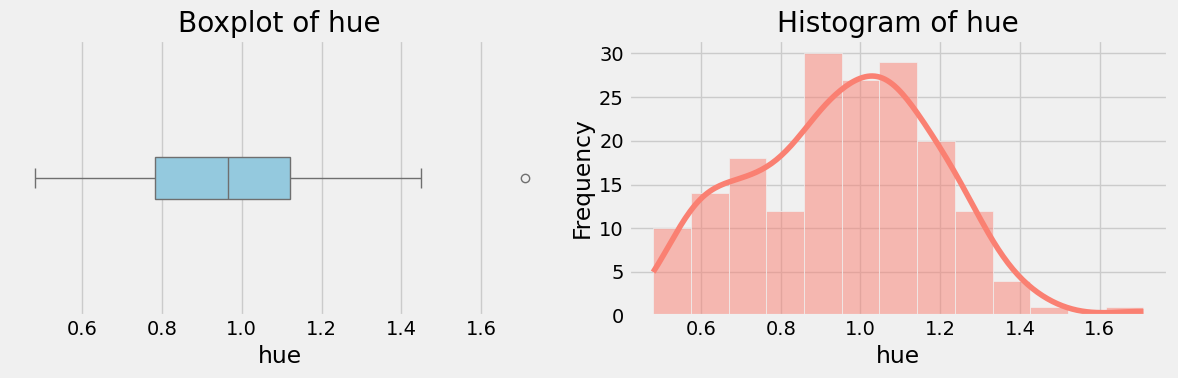

In [82]:
### hue

descr_stats("hue")
boxplot_histogram("hue")

# od280/od315_of_diluted_wines

Descriptive Statistics - od280/od315_of_diluted_wines:
	Mean: 2.6116853932584267
	Median: 2.78
	Minimum Value: 1.27
	Maximum Value: 4.0
	Variance: 0.501254462820351
	Standard Deviation: 0.7079932646716005
	Lower Quartile (Q1): 1.9375
	Upper Quartile (Q3): 3.17
	Interquartile Range (IQR): 1.2325
	Spread: 2.73
	Mode: 2.87


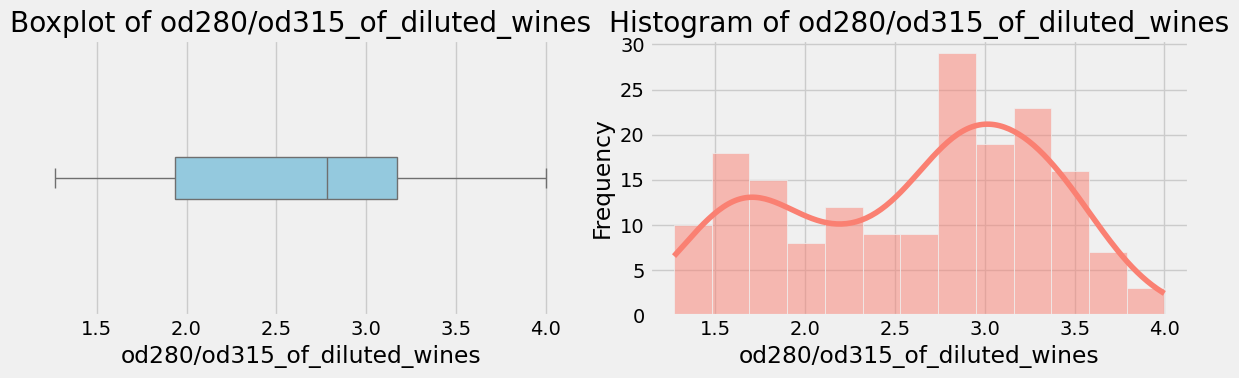

In [83]:
### od280/od315_of_diluted_wines

descr_stats("od280/od315_of_diluted_wines")
boxplot_histogram("od280/od315_of_diluted_wines")

# proline

Descriptive Statistics - proline:
	Mean: 746.8932584269663
	Median: 673.5
	Minimum Value: 278.0
	Maximum Value: 1680.0
	Variance: 98609.60096578715
	Standard Deviation: 314.0216568419878
	Lower Quartile (Q1): 500.5
	Upper Quartile (Q3): 985.0
	Interquartile Range (IQR): 484.5
	Spread: 1402.0
	Mode: 520.0


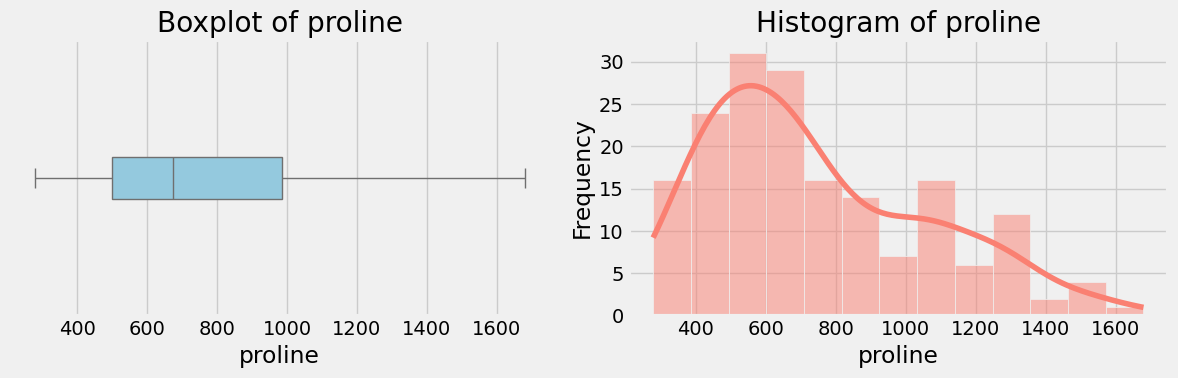

In [84]:
### proline

descr_stats("proline")
boxplot_histogram("proline")